# LocallyLinearEmbedding with Normalize

This code template is for LocallyLinearEmbedding in python for the dimensionality reduction technique. LLE first finds the k-nearest neighbors of the points. Then, it approximates each data vector as a weighted linear combination of its k-nearest neighbors. Finally, it computes the weights that best reconstruct the vectors from their neighbors and then produces the low-dimensional vectors best reconstructed by these weights. Normalize is utilized for the data rescaling process.

### Required Packages

In [36]:
import warnings 
import itertools
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler 
from sklearn.manifold import LocallyLinearEmbedding
warnings.filterwarnings('ignore')

### Initialization



Filepath of CSV file

In [37]:
#filepath
file_path= "

List of features which are  required for model training .

In [38]:
#x_values
features=[]

Target feature for prediction.

In [39]:
#y_value
target=''

### Data Fetching



Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [40]:
df=pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Feature Selections



It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [41]:
X = df[features]
Y = df[target]

### Data Preprocessing



Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [42]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

In [43]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Correlation Map



In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

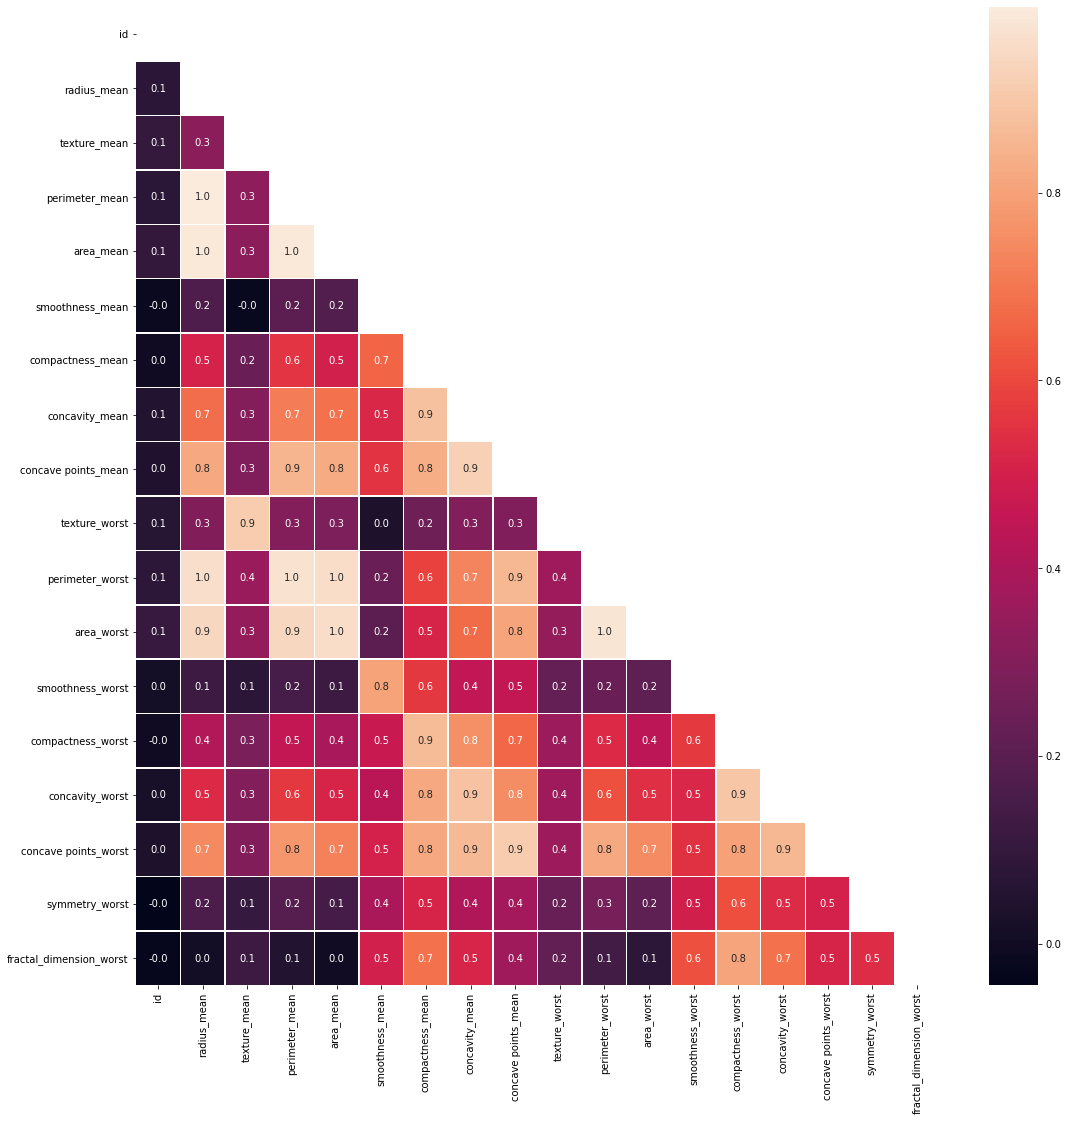

In [44]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Rescaling


 
Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

[For more information](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [45]:
X_norm=preprocessing.normalize(X)

#### Scree plot
The scree plot helps you to determine the optimal number of components. The eigenvalue of each component in the initial solution is plotted. Generally, you want to extract the components on the steep slope. The components on the shallow slope contribute little to the solution. 

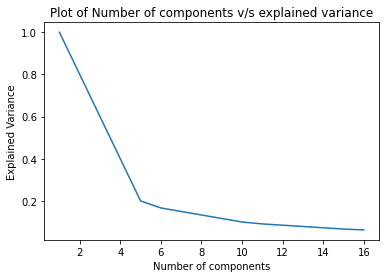

In [46]:
explained=[]
n_comp = [i for i in range(1,X_norm.shape[1]) if i % 5 in (0,1)] 
for i in n_comp:
  LLE = LocallyLinearEmbedding(n_components=i,random_state=41)
  LLEX = pd.DataFrame(data = LLE.fit_transform(X_norm))
  explained_variance = (np.var(LLEX, axis=0))
  explained_variance_ratio = explained_variance / np.sum(explained_variance)
  explained.append(np.mean(explained_variance_ratio))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

### Model
A locally linear embedding (LLE) preserves distances within local neighbourhoods by presenting the data in lower-dimensional formats

The standard LLE algorithm comprises three stages:


*   Nearest Neighbors Search
*   Weight Matrix Construction
*   Partial Eigenvalue Decomposition



#### Tuning Parameter

> **n_components**:Desired dimensionality of output data. Must be strictly less than the number of features. The default value is useful for visualisation. For LSA, a value of 100 is recommended.


> **n_iter**:Number of iterations for randomized LLE solver.

> **tol**:Tolerance for ARPACK.

[For more detail on API](https://scikit-learn.org/stable/modules/manifold.html#locally-linear-embedding)

In [47]:
LLE = LocallyLinearEmbedding(n_components=3,n_neighbors=10, random_state=41)
LLEX = pd.DataFrame(data = LLE.fit_transform(X_norm))

#### Output Dataframe

In [48]:
finalDf = pd.concat([LLEX, Y], axis = 1)
finalDf.head()

,0,1,2,diagnosis
0,-0.043396,-0.000108,-0.034372,M
1,-0.043396,-0.000202,-0.064359,M
2,-0.043396,0.000086,0.027988,M
3,-0.043396,-0.000203,-0.064738,M
4,-0.043396,-0.000170,-0.054057,M


In [49]:
finalDf.describe()

,0,1,2
count,569.000000,569.000000,569.000000
mean,-0.040498,0.010283,-0.000044
std,0.010842,0.040677,0.041959
min,-0.043396,-0.050187,-0.069604
25%,-0.043396,-0.000109,-0.037202
50%,-0.043396,0.000014,0.000556
75%,-0.043396,0.000131,0.035549
max,0.000017,0.171066,0.075221


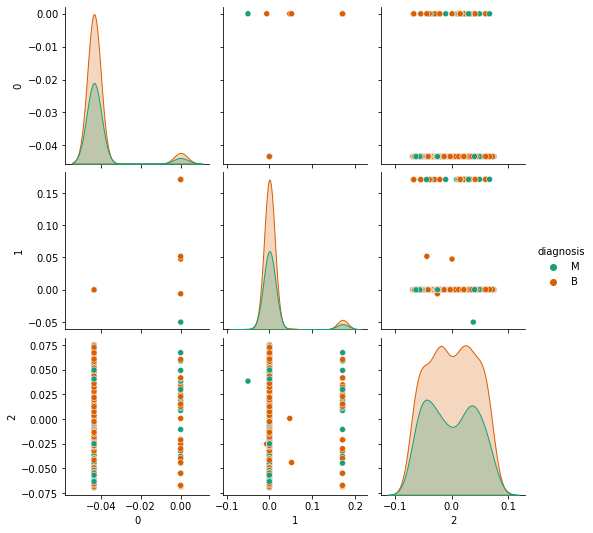

In [50]:
se.pairplot(finalDf, hue=target, palette='Dark2')

 #### Creator: Neel Pawar, Github: [Profile]( https://github.com/neel-ntp)